In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir('..')
import config

import tensorflow as tf

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

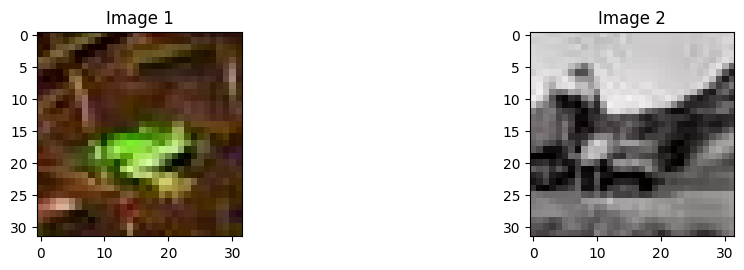

In [2]:
import random
number1_1, number2_1 = random.randint(0, 999), random.randint(0, 999)
number1_2, number2_2 = random.randint(2, 10), random.randint(2, 10)

image1 = plt.imread(os.path.join(config.BASE_DIR, 'data', 'test', 'FAKE', f'{number1_1} ({number1_2}).jpg'))
image2 = plt.imread(os.path.join(config.BASE_DIR, 'data', 'test', 'FAKE', f'{number2_1} ({number2_2}).jpg'))


plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.title('Image 1')

plt.subplot(2, 2, 2)
plt.imshow(image2)
plt.title('Image 2')

plt.tight_layout()
plt.show()

In [3]:
train_real = pd.read_csv(config.datasets['train-real'], header=None)
train_fake = pd.read_csv(config.datasets['train-fake'], header=None)
test_real = pd.read_csv(config.datasets['test-real'], header=None)
test_fake = pd.read_csv(config.datasets['test-fake'], header=None)

train = pd.concat([train_real, train_fake], axis=0)
test = pd.concat([test_real, test_fake], axis=0)

In [4]:
flatted_X_train, y_train = train.iloc[:, :3072], train.iloc[:, -1]
flatted_X_test, y_test = test.iloc[:, :3072], test.iloc[:, -1]

In [5]:
image_shape = config.model_prams['input_shape']

X_train = tf.reshape(flatted_X_train, (-1, *image_shape))
X_test = tf.reshape(flatted_X_test, (-1, *image_shape))

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(TensorShape([100000, 32, 32, 3]),
 (100000,),
 TensorShape([20000, 32, 32, 3]),
 (20000,))

In [7]:
tf.random.set_seed(config.model_prams['seed'])

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

c:\Users\Lakhal Badr\Desktop\AI-Detective1\.vnev\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer=config.model_prams['optimizer'],
    loss=config.model_prams['loss'],
    metrics=['accuracy', 'Precision', 'Recall']
    )

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs = config.model_prams['epochs'],
    )

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - Precision: 0.7801 - Recall: 0.9015 - accuracy: 0.7764 - loss: 0.4718 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8260 - val_loss: 0.3678
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - Precision: 0.8983 - Recall: 0.9202 - accuracy: 0.8846 - loss: 0.2754 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8386 - val_loss: 0.3552
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - Precision: 0.9198 - Recall: 0.9350 - accuracy: 0.9081 - loss: 0.2264 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8539 - val_loss: 0.3414
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - Precision: 0.9278 - Recall: 0.9421 - accuracy: 0.9178 - loss: 0.2040 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8208 - val_loss: 0.4032
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - Precision: 0.9314 - Recall: 0.9454 - accuracy: 0.9221 - los

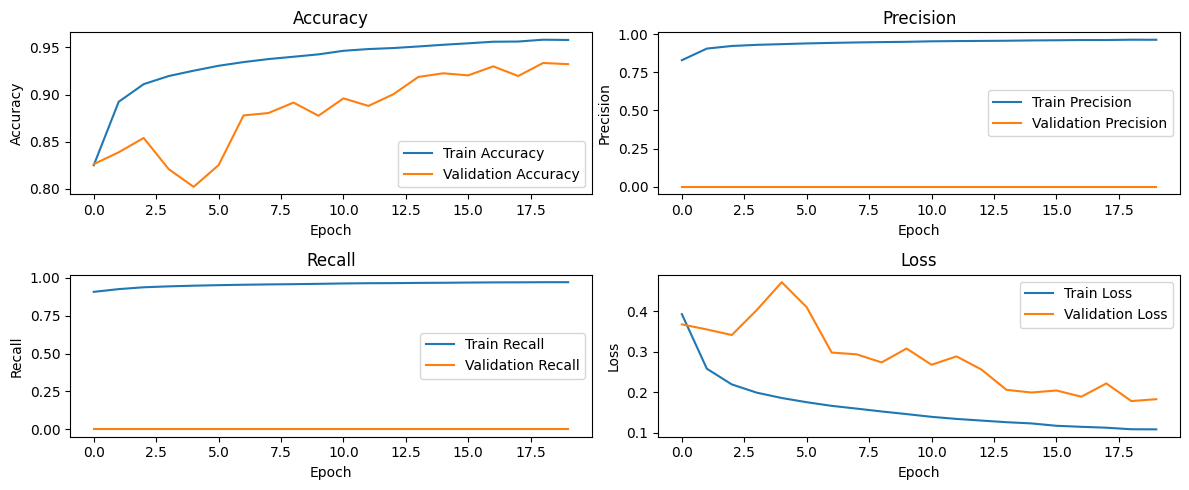

In [10]:
history_dict = history.history

plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history_dict:
    plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_dict['Precision'], label='Train Precision')
if 'val_Precision' in history_dict:
    plt.plot(history_dict['val_Precision'], label='Validation Precision')
plt.title('Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history_dict['Recall'], label='Train Recall')
if 'val_Recall' in history_dict:
    plt.plot(history_dict['val_Recall'], label='Validation Recall')
plt.title('Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_dict['loss'], label='Train Loss')
if 'val_loss' in history_dict:
    plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)

print(f"model's loss: {round(loss, 3)}")
print(f"model's accuracy: {round(accuracy, 2)}")
print(f"model's precision: {round(precision, 2)}")
print(f"model's recall: {round(recall, 2)}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Precision: 0.9830 - Recall: 0.9160 - accuracy: 0.9190 - loss: 0.2619
model's loss: 0.228
model's accuracy: 0.93
model's precision: 0.93
model's recall: 0.92


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


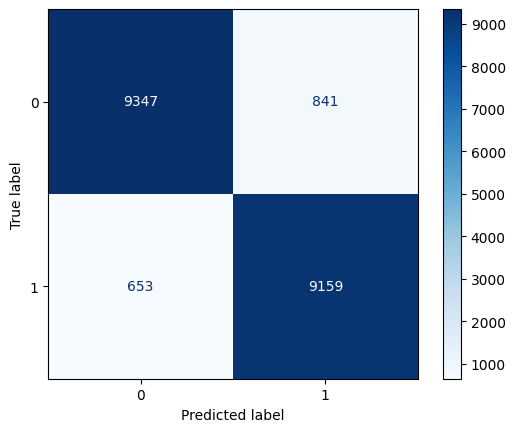

In [12]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > config.model_prams['threshold']).astype(int)


cm = confusion_matrix(y_pred_classes, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [13]:
model.save(config.model_path)